In [1]:
from prerequisites import *

# Chapter 2 Two-Dimensional maps
***

## Chapter 2.1 Mathematical models
***

### Exercise T2.1
> Check that the period-two orbit of the Henon map with $a=1.28$ and
$b=-0.3$ is approximately $\{(0.7618, 0.5382), (0.5382, 0.7618)\}$.

The Henon map is given by $f(x, y) = (a-x^2+by, x)$ where $a, b$ - constants.

In [2]:
def henon(p, c):
    x, y = p
    a, b = c
    return np.array([a-x*x+b*y, x])
p1 = np.array([0.7618, 0.5382])
p2 = np.array([0.5382, 0.7618])
c = (1.28, -0.3)
print(p1, "-> ["+", ".join(map("{0:0.4f}".format, henon(p1, c)))+"]")
print(p2, "-> ["+", ".join(map("{0:0.4f}".format, henon(p2, c)))+"]")

[0.7618 0.5382] -> [0.5382, 0.7618]
[0.5382 0.7618] -> [0.7618, 0.5382]


### Computer Experiment 2.1
Write a program to iterate the Henon map. Set $a=1.28$ and $b= 0.3$ as in Figure 2.3(a). Using the initial condition $(x, y)=(0, 0)$, create the period two orbit, and view it either by printing a list of numbers or by plotting $(x, y)$
points. Change $a$ to $1.2$ and repeat. How does the second orbit differ from the
first? Find as accurately as possible the value of a between $1.2$ and $1.28$ at which
the orbit behavior changes from the first type to the second.

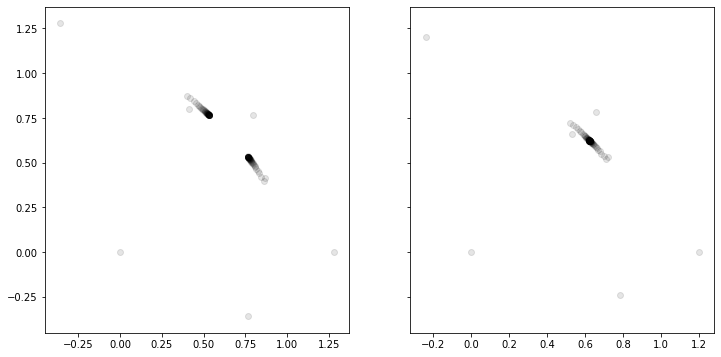

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),
                               sharey=True)
c = (1.28, -0.3)
orbit = orbit_of_map((0,0), henon, c, 100)
ax1.scatter(*zip(*orbit),color = 'k', alpha=0.1)
c = (1.2, -0.3)
orbit = orbit_of_map((0,0), henon, c, 100)
ax2.scatter(*zip(*orbit),color = 'k', alpha=0.1);

As we can see at $a=1.28$ we have a period $2$ orbit and in the case of $a = 1.2$ we have a single fixed point. 

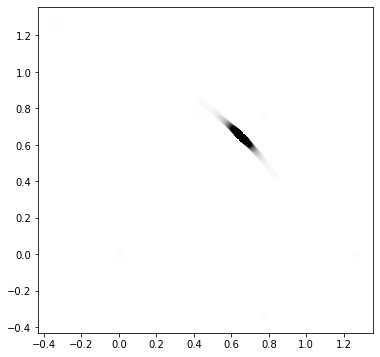

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
c = (1.26755, -0.3)
orbit = orbit_of_map((0,0), henon, c, 100000)
ax.scatter(*zip(*orbit),color = 'k', alpha=0.01);

Experiments show that $a=1.2675$ is about the value of $a$ at which the splitting happens

## Chapter 2.2 Sinks, Sources and Saddles 
***

### Exercise T2.2
> Show that the Henon map with parameters $a =0$, $b=0.4$, has exactly two fixed points, $(0, 0)$ and
$(-0.6, -0.6)$.

*Proof*: $f(x, y) = (-x^2 + 0.4y, x) = (x, y)$ implies that $y=x$ and $-x^2 + 0.4y = x$ which further becomes $-x^2 + 0.4x = x\Rightarrow x^2+0.6x=0\Rightarrow x(x+0.6) = 0$. So we have that either $x = y = 0$ or $x = y = -0.6$ as required.

## Chapter 2.3 Linear maps
***

### Exercise T2.3
> Let $A = \begin{pmatrix}a & 1 \\ 0 & a\end{pmatrix}$, then  
(a) Verify that $A^n = a^{n-1}\begin{pmatrix}a & n\\ 0 & a\end{pmatrix}$.  
(b) Show that the fixed point $(0,0)$ is a sink if $|a|< 1$ and a source if $|a| > 1$. What happens when $|a| = 1$?

*Proof*: (a) Clearly $A^1$ is of this form, now assume it holds for $n-1$, then 
$$A^n = A^{n-1}A = a^{n-2}\begin{pmatrix}a & n-1\\ 0 & a\end{pmatrix}\begin{pmatrix}a & 1 \\ 0 & a\end{pmatrix}=
a^{n-2}\begin{pmatrix}a^2 & an\\ 0 & a^2\end{pmatrix} = a^{n-1}\begin{pmatrix}a & n\\ 0 & a\end{pmatrix}$$. Therefore we are done.  
(b) consider $v = \begin{pmatrix} x\\ y\end{pmatrix}$, then $A^n v = a^{n-1}\begin{pmatrix} ax+ny\\ ay\end{pmatrix} = \begin{pmatrix} a^nx+na^{n-1}y\\ a^ny\end{pmatrix}$. Now note that exponentials overtake linear terms, so if $|a|>1$, then each coordinate of $A$ goes to either plus or minus infinity, and otherwise, if $|a|<1$, then they converge to $(0,0)$.  
If $a = 1$, then $A^n v = \begin{pmatrix} x+ny\\ y\end{pmatrix}$, so points $\begin{pmatrix} x\\ 0\end{pmatrix}$ would be stationary under this map and all other points would diverge to infinity.  
If $a = -1$, then $A^n v = (-1)^{n}\begin{pmatrix} x-ny\\ y\end{pmatrix}$ and we get a similar situation to the above.

## Chapter 2.4 Change of coordinates
***

This section is basically a review of linear algebra. 

## Chapter 2.5 Nonlinear maps and the Jacobian matrix
***

### Jacobian matrix
**Def**: Let $f = (f_1, f_2, \ldots f_m)$ be a map on $\mathbb{R}^m$, and let $p\in\mathbb{R}^m$. The the **Jacobian matrix** of $f$ at $p$, denoted $Df(p)$ is 
$$Df(p) = \begin{pmatrix}\frac{\partial f_1}{\partial x_1}(p) & \cdots & \frac{\partial f_1}{\partial x_m}(p) \\
                         \vdots & \ddots & \vdots \\
                         \frac{\partial f_m}{\partial x_1}(p)& \cdots & \frac{\partial f_m}{\partial x_m}(p)\end{pmatrix}$$
*Rem*: The Jacobian can be used to find the best linear approximation of a function about a point, i.e. $f(x) \approx f(p) + Df(p)(x-p)$. We can use this to infer stability results.  
The Jacobian also satisfies the chain rule, i.e. $D(f\circ g)(x) = Df(g(x)) Dg(x)$  
Example: Consider the Henon map $f(x, y) = (a-x^2+by, x)$ with $a=0, b=0.4$. The fixed points are given by solving the system
$$\begin{cases}-x^2+0.4y=x\\ y = x\end{cases} \Longrightarrow x^2-0.6x = 0\Longrightarrow x=y=0\textrm{ or }x=y=0.6$$
So the fixed points are $(0,0)$ and $(0.6,0.6)$. Now the Jacobian matrix is given by
$$Df(x, y) = \begin{pmatrix}\frac{\partial f_x}{\partial x} & \frac{\partial f_x}{\partial y}\\
\frac{\partial f_y}{\partial x} & \frac{\partial f_y}{\partial y}\end{pmatrix} = 
\begin{pmatrix} -2x & 0.4\\
1 & 0\end{pmatrix}$$
So in particular $Df(0,0)=\begin{pmatrix} 0 & 0.4\\
1 & 0\end{pmatrix}$ and $Df(0.6,0.6)=\begin{pmatrix} -1.2 & 0.4\\
1 & 0\end{pmatrix}$.   
We also get this computationally:  

In [5]:
c = (0, 0.4)
print("Df(0,0) = \n", jacobian(np.array([0, 0]), henon, c, 2))
print("Df(0.6,0.6) = \n", jacobian(np.array([0.6, 0.6]), henon, c, 2))

Df(0,0) = 
 [[0.  0.4]
 [1.  0. ]]
Df(0.6,0.6) = 
 [[-1.2  0.4]
 [ 1.   0. ]]


### Theorem 2.11
**Thm**: Let $f$ be a map on $\mathbb{R}^m$, and $p$ a fixed point. Then:
* If the magnitude of each eigenvalue of $Df(p)$ is less than $1$, then $p$ is a sink.  
* If the magnitude of at least one eigenvalue of $Df(p)$ is greater than $1$, then $p$ is an unstable fixed point.
* If the magnitude of all eigenvalues of $Df(p)$ is greater than $1$, then $p$ is a source.

*Proof*: Recall from before that $f(x) \approx f(p) + Df(p)(x-p)$, so if we let $p$ be a fixed point and neglect higher order terms, then $f(x) = p + Df(p)(x-p)$, so if we let $x_0 = p+\varepsilon_0$, and then define recursively $x_n = f(x_{n-1})$ and $\varepsilon_n = x_n-p$, then we can see that
$$\varepsilon_{n+1} = x_{n+1}-p = f(x_{n})-p = Df(p)(x_n-p)= Df(p)\varepsilon_{n}\Longrightarrow \varepsilon_{n} = Df(p)^n\varepsilon_{0}$$
Where $Df(p)^n$ is the $n$-th power of $Df(p)$ as a matrix. So in particular, if we diagonalize $Df(p)$ as a possibly complex-valued matrix (which is always possible), i.e. we express $Df(p) = A^{-1}DA$ where 
$D = \begin{pmatrix}
\lambda_1 & 0 &\cdots & 0\\
0 & \lambda_2 &  & 0\\
\vdots &  & \ddots & \vdots \\
0 & 0 & \cdots & \lambda_m
\end{pmatrix}$, then 
$Df(p)^n  = A^{-1}D^n A = A^{-1} \begin{pmatrix}
\lambda_1^n & 0 &\cdots & 0\\
0 & \lambda_2^n &  & 0\\
\vdots &  & \ddots & \vdots \\
0 & 0 & \cdots & \lambda_m^n
\end{pmatrix} A$  
And we see clearly that the eigenvalues directly control the magnitude of the vector in the eigendirections. So the conclusion follows.  
Example: Look at the Henon map with $a=0, b=0.4$ as before. For the fixed point $(0,0)$ we have that $Df(0,0)=\begin{pmatrix} 0 & 0.4\\
1 & 0\end{pmatrix}$, so to find eigenvalues solve $\lambda^2-0.4=0$ so eigenvalues are $\lambda_1=\sqrt{0.4}\approx 0.632,\lambda_2=-\sqrt{0.4}\approx-0.632$, both have magnitude less than $1$, so this is a sink of the map.  
Now consider $(0.6,0.6)$, $Df(0.6,0.6)=\begin{pmatrix} -1.2 & 0.4\\
1 & 0\end{pmatrix}$, so $(\lambda+1.2)\lambda-0.4=0\Longrightarrow \lambda^2+1.2\lambda-0.4 = 0$, so $\lambda_1 \approx 1.472, \lambda_2\approx -0.272$, thus it is an unstable fixed point.  

In [6]:
c = (0, 0.4)
print("The eigenvalues of Df(0,0) are", np.linalg.eigvals(jacobian(np.array([0, 0]), henon, c, 2)))
print("The eigenvalues of Df(0.6,0.6) are", np.linalg.eigvals(jacobian(np.array([0.6, 0.6]), henon, c, 2)))

The eigenvalues of Df(0,0) are [ 0.63245553 -0.63245553]
The eigenvalues of Df(0.6,0.6) are [-1.47177979  0.27177979]


### Theorem 2.11 for periodic points
*Rem*: The classification of theorem 2.11 holds true for periodic orbits, we just replace $f$ by $f^k$, or, alternatively, if $\{p_1,p_2,\ldots, p_k\}$ is a period $k$ orbit, then consider the eigenvalues of $Df(p_1)Df(p_2)\ldots Df(p_k)$. The two approaches are equivalent by the chain rule, as well as the fact that eigenvalues of a product of matrices are not affected by a cyclic shift.  
Example: Consider the Henon map with $a = 0.43$ and $b=0.4$. We can sheck that $\{(-0.1,0.7),(0.7,-0.1)\}$ is an orbit and find its stability:

In [7]:
c = (0.43, 0.4)
p1 = np.array([-0.1,0.7])
p2 = np.array([0.7,-0.1])
print(p1, "->", henon(p1,c))
print(p2, "->", henon(p2,c))
J1 = jacobian(p1, henon, c, 2)
J2 = jacobian(p2, henon, c, 2)
print("Df(-0.1,0.7) = \n", J1)
print("Df(0.7,-0.1) = \n", J2)
print("Df(-0.1,0.7)*Df(0.1,-0.7) =\n", np.matmul(J1,J2))
w = np.linalg.eigvals(np.matmul(J1,J2))
print("The eigenvalues are", w, "their magnitudes are", np.abs(w), "respectively")


[-0.1  0.7] -> [ 0.7 -0.1]
[ 0.7 -0.1] -> [-0.1  0.7]
Df(-0.1,0.7) = 
 [[0.2 0.4]
 [1.  0. ]]
Df(0.7,-0.1) = 
 [[-1.4  0.4]
 [ 1.   0. ]]
Df(-0.1,0.7)*Df(0.1,-0.7) =
 [[ 0.12  0.08]
 [-1.4   0.4 ]]
The eigenvalues are [0.26+0.30397368j 0.26-0.30397368j] their magnitudes are [0.4 0.4] respectively


As both eigenvalues have magnitude less than $1$, we see that this is a sink. Note that the eigenvalues being complex did not matter.

### Hyperbolic fixed points
**Def**: Let $f$ be a map on $\mathbb{R}^m$.
Then a fixed point p is called **hyperbolic** if none of the eigenvalues of $Df(p)$
have magnitude $1$. If $p$ is hyperbolic and if at least one eigenvalue of $Df(p)$ has
magnitude greater than $1$ and at least one eigenvalue has magnitude less than $1$,
then $p$ is called a **saddle**. (For a periodic point of period $k$, replace $f$ by $f^k$.)  
Example: From the example of the Henon map where $a=0, b = 0.4$ we see that $(0,0)$ is a hyperbolic f.p. but not a saddle, and $(0.6,0.6)$ is a saddle. In the example of the Henon map where $a=0.43,b=0.4$ we saw that the orbit $\{(-0.1, 0.7), (0.7,-0.1)\}$ is hyperbolic.

### Exercise T2.5
>Prove that the Henon map has a period-two orbit if and only if $4a >3(1 - b)^2$.

*Proof*: As discussed in the book, a period $2$ orbit exists iff the equation $x^2 - (1 - b)x - a + (1 - b)^2$ has exactly two roots, which occurs precisely when $4a >3(1 - b)^2$ by considering the determinant. 

### Exercise T2.6
>(a) If $(x_1, y_1)$ and $(x_2, y_2)$ are the two fixed points of the Henon map
(2.27) with some fixed parameters $a$ and $b$, show that $x_1 -y_1 = x_2 -y_2 = 0$
and $x1 + x2 = y1 + y2  =  b - 1$.  
(b) If $\{(x_1, y_1), (x_2, y_2)\}$ is the period-two orbit, show that $x_1 + y_1 =
x_2 + y_2 = x_1 + x_2 = y_1 + y_2 = 1 - b$. In particular the period-two orbit
lies along the line $x = y = 1 - b$, as seen in Figure 2.15.

*Proof*: **TODO**